In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/kaggle/input/awe2
# mkdir kaggle
# cd kaggle
# mkdir input
# cd input

/content/drive/MyDrive/kaggle/input/awe2


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

./weightsv2.best.hdf5
./train/renametrain.sh
./train/006/03_png.rf.b948cf5b1735cebf170ec1bfe661a0b5.jpg
./train/006/01_png.rf.73e6cba8e31c24db7b0387284346c35f.jpg
./train/006/01_png.rf.1a9da5ceb42fb06b4f150dbb0cd8e5cd.jpg
./train/006/01_png.rf.adc6d540db1bdbd889dd5a0debfef669.jpg
./train/006/06_png.rf.751283fce8aa1d17eaa8d8457c0ecb43.jpg
./train/006/06_png.rf.81615fc31d5f753e4a8fce9687bdf89b.jpg
./train/006/06_png.rf.e83a1278f85340e5cecc7f17a9573a11.jpg
./train/006/02_png.rf.1d3dc913d9b960450428d02cdd64d29b.jpg
./train/006/05_png.rf.af657fc635849af0d414b33ac214af76.jpg
./train/006/03_png.rf.b414eceb63931b148e1efed8b8fbd7ca.jpg
./train/006/02_png.rf.90b8489c82cda8eca8db9eadaffdb5a7.jpg
./train/006/04_png.rf.c43e6d60340b8a2552e46141cc428d80.jpg
./train/006/05_png.rf.ea57c599b4c3f0c59c1aa1b948444688.jpg
./train/006/04_png.rf.64243e9e39c2a6e6cfdafe7f9d7b2431.jpg
./train/006/05_png.rf.aedbbb17b57156cb708b7dfc57883bb2.jpg
./train/006/03_png.rf.b6aa56fcabaa26595af1b2735f3eb8bf.jpg
./train/006

In [5]:
#building CNN
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

In [6]:
classifier = Sequential() #initialize cnn

In [7]:
classifier.add(Conv2D(filters=32,kernel_size=3, strides=(1,1), input_shape=(64,64,3), padding='same', activation = 'relu')) #number of feature detectors, row, column

In [8]:
classifier.add(MaxPooling2D(pool_size = (3,3)))

In [9]:
classifier.add(Conv2D(filters=64,kernel_size=3, strides=1, padding = 'same', activation = 'relu')) #number of feature detectors, row, column

In [10]:
classifier.add(MaxPooling2D(pool_size = (3,3)))

In [11]:
classifier.add(Conv2D(filters=64,kernel_size=3, strides=1, padding ='same', activation = 'relu')) #number of feature detectors, row, column

In [12]:
classifier.add(MaxPooling2D(pool_size = (3,3)))

In [13]:
classifier.add(Flatten())

In [14]:
classifier.add(Dense(512 , activation = 'tanh'))

In [15]:
classifier.add(Dense(100 , activation = 'softmax'))

In [16]:
classifier.compile( optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [17]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
batch_size = 32

In [19]:
training_set = train_datagen.flow_from_directory('./train',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('./test',
                                            target_size = (64, 64),
                                            batch_size = batch_size//2,
                                            class_mode = 'categorical')

Found 1800 images belonging to 100 classes.
Found 400 images belonging to 100 classes.


In [20]:
filepath = "weightsv2.best.hdf5"

In [21]:
call_back = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=0, save_best_only=True, save_weights_only=False, mode='auto')
checkpoints = [call_back]

In [36]:
import keras
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="./logs")

In [22]:
%load_ext tensorboard
%tensorboard --logdir logs/validation

In [37]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 20,
                         epochs = 50,
                         validation_data = test_set,
                         callbacks=[tensorboard_callback])
                         #callbacks = checkpoints)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/50
20/20 [==============================] - 3s 128ms/step - loss: 0.6675 - accuracy: 0.8156 - val_loss: 5.8218 - val_accuracy: 0.1400
Epoch 2/50
20/20 [==============================] - 2s 125ms/step - loss: 0.5649 - accuracy: 0.8490 - val_loss: 5.8477 - val_accuracy: 0.1425
Epoch 3/50
20/20 [==============================] - 3s 130ms/step - loss: 0.5778 - accuracy: 0.8469 - val_loss: 5.8616 - val_accuracy: 0.1200
Epoch 4/50
20/20 [==============================] - 2s 123ms/step - loss: 0.5908 - accuracy: 0.8360 - val_loss: 5.8445 - val_accuracy: 0.1375
Epoch 5/50
20/20 [==============================] - 2s 126ms/step - loss: 0.5744 - accuracy: 0.8453 - val_loss: 5.8942 - val_accuracy: 0.1175
Epoch 6/50
20/20 [==============================] - 2s 125ms/step - loss: 0.5758 - accuracy: 0.8490 - val_loss: 5.8741 - val_accuracy: 0.1175
Epoch 7/50
20/20 [==============================] - 2s 123ms/step - loss: 0.5363 - accuracy: 0.8588 - val_loss: 5.9825 - val_accuracy: 0.1300
Epoch 

In [ ]:
classifier.summary()

In [26]:
# list all data in history
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


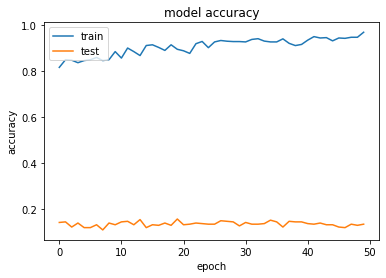

In [38]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

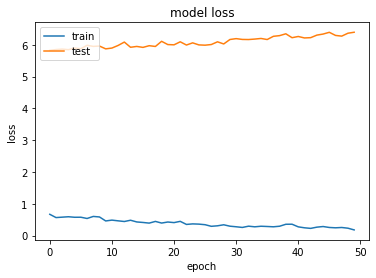

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()